In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Importing the data

treino = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
teste = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
exemplo = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

print(treino.head())
print(teste.head())
print(exemplo.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Variables with the wrong type
* ## Categorical variables labled as numerical
The variables OverallQual and OverallCond should be stored as category, as it refers to rates.

In [5]:
for df in [teste, treino]:
    for variable in ['OverallQual','OverallCond']:
        df[variable] = df[variable].astype('category') 

* ## Continuous variables labled as integer
This is the case of the following variables: 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea, 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', and 'SalePrice'.

It will be important to correct classify these variables because of the missing values: some of them accept an average, while others a mode would fit it better.

In [6]:
for df in [teste, treino]:
    for variable in ['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                     'ScreenPorch', 'PoolArea', 'MiscVal']:
        df[variable] = df[variable].astype('float')
treino.SalePrice = treino.SalePrice.astype('float')

* # Integer variables labled as continous
They are: 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars'.

In [7]:
for df in [teste, treino]:
    for variable in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
        df[variable] = df[variable].astype('Int64')


# Dealing with null values 

* ## Alley values. 
The null values actually mean no alley access


In [8]:
print(treino.Alley.unique())
treino.Alley = treino.Alley.fillna("NA").astype('category')
teste.Alley = teste.Alley.fillna("NA").astype('category')

[nan 'Grvl' 'Pave']


* ## Masonry veneer type & area


In [9]:
# The null values are at the same entry.
print((treino.MasVnrArea.isna() == treino.MasVnrType.isna()).unique())

# Since mostly of the masonry values are None, 
print(treino.MasVnrType.value_counts())

# it is reasonable to assume the na values are also None
treino.MasVnrType = treino.MasVnrType.fillna("None").astype('category')
treino.MasVnrArea = treino.MasVnrArea.fillna(0.0)

[ True]
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [10]:
teste.MasVnrType = teste.MasVnrType.fillna("None").astype('category')
teste.MasVnrArea = teste.MasVnrArea.fillna(0.0)

* ## Lotfrontage
The Fontage is the linear length of street connected to property. It is not reasonable to set the *na values* to  in this case, because the missing values correspond to different configurations of the lot (according to the variable LotConfig).

In [11]:
treino.LotConfig[treino.LotFrontage.isna()].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

It is wiser to fill the missing data with the mean LotFrontage of the correspondent lot configuration.

In [12]:
treino.groupby(['LotConfig'])['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

In [13]:
lotconfig_mean = treino.groupby(['LotConfig'])['LotFrontage'].mean()
treino.LotFrontage = treino.LotFrontage.fillna(treino.LotConfig.map(lotconfig_mean))

In [14]:
lotconfig_mean2 = teste.groupby(['LotConfig'])['LotFrontage'].mean()
teste.LotFrontage = teste.LotFrontage.fillna(teste.LotConfig.map(lotconfig_mean2))

* ## Basement variables
All the basement categorical variables seem to be missing the same number of entries (with one exception). It seems that the NA (no basement) category was misiterpreted as null values. Let's check.  

In [15]:
print(treino.BsmtQual.value_counts())
print()
print(teste.BsmtQual.value_counts())
print()
print(treino.BsmtCond.value_counts())
print()
print(treino.BsmtExposure.value_counts())
print()
print(treino.BsmtFinType1.value_counts())
print()
print(treino.BsmtFinType2.value_counts())
print()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64



As it is possible to observe,there is not a single property with the no-basement category, which indicates that our hypostesis was correct. Let's check if the missing values are at the same entries to all the variables.

In [16]:
((treino.BsmtQual.isna()==treino.BsmtCond.isna())==(
    treino.BsmtExposure.isna()==treino.BsmtFinType1.isna())).value_counts()

True     1459
False       1
dtype: int64

Our hypotesis is corroborated. Let's fill the missing values with NA catecogory.

In [17]:
def fill_and_categ(df_, variavel, valor):
    df_[variavel] = df_[variavel].fillna(valor).astype('category') 

In [18]:
for df in [treino, teste]:
    fill_and_categ(df,'BsmtQual','NA')
    fill_and_categ(df,'BsmtCond','NA')
    fill_and_categ(df,'BsmtExposure','NA')
    fill_and_categ(df,'BsmtFinType1','NA')
    fill_and_categ(df,'BsmtFinType2','NA')

* ## Fireplace
The same thing migh be happening with the category variable FireplacesQu (quality).
The missing values correspond to the entries with 0 fireplaces (as shown below), so we can fill with the catecory NA.

In [19]:
print(treino.Fireplaces[treino.FireplaceQu.isna()].unique())
print(teste.Fireplaces[teste.FireplaceQu.isna()].unique())

[0]
[0]


In [20]:
for df in [treino, teste]:
    fill_and_categ(df,'FireplaceQu','NA')

* ## Garage variables
It seems the categorical variables of the garage have the same problem with the NA category.

In [21]:
for df in [treino, teste]:
    print("NA" in df.GarageType or "NA" in df.GarageYrBlt or 
          "NA" in df.GarageFinish or "NA" in df.GarageQual or 
          "NA" in df.GarageCond)

False
False


In [22]:
for df in [treino, teste]:
    for variavel in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
        fill_and_categ(df,variavel,'NA')

* ## Pool, Fence and Miscellaneous

In [23]:
for df in [treino, teste]:
    print("NA" in df.PoolQC or "NA" in df.Fence or 
          "NA" in df.MiscFeature)

False
False


In [24]:
for df in [treino, teste]:
    for variavel in ['PoolQC', 'Fence', 'MiscFeature']:
        fill_and_categ(df,variavel,'NA')

* ## Electrical variable
There is one missing value. It will be filled with the mode

In [25]:
treino.Electrical = treino.Electrical.fillna(treino.Electrical.mode()[0])

In [26]:
for variavel in teste.columns:
    if len(teste) != teste[variavel].value_counts().sum():
        if teste[variavel].dtype == 'Int64' or teste[variavel].dtype == 'int64':
            print(f'integer var {variavel} with {len(teste) - teste[variavel].value_counts().sum()} missing values, mode: {teste[variavel].mode()[0]}')
        elif teste[variavel].dtype == 'float64':
            print(f'float var {variavel} with {len(teste) - teste[variavel].value_counts().sum()} missing values, mean: {teste[variavel].mean()}')
        elif teste[variavel].dtype == 'object':
            print(f'categorical var {variavel} with {len(teste) - teste[variavel].value_counts().sum()} missing values, mode: {teste[variavel].mode()[0]}')

categorical var MSZoning with 4 missing values, mode: RL
categorical var Utilities with 2 missing values, mode: AllPub
categorical var Exterior1st with 1 missing values, mode: VinylSd
categorical var Exterior2nd with 1 missing values, mode: VinylSd
float var BsmtFinSF1 with 1 missing values, mean: 439.2037037037037
float var BsmtFinSF2 with 1 missing values, mean: 52.61934156378601
float var BsmtUnfSF with 1 missing values, mean: 554.2949245541838
float var TotalBsmtSF with 1 missing values, mean: 1046.1179698216736
integer var BsmtFullBath with 2 missing values, mode: 0
integer var BsmtHalfBath with 2 missing values, mode: 0
categorical var KitchenQual with 1 missing values, mode: TA
categorical var Functional with 2 missing values, mode: Typ
integer var GarageCars with 1 missing values, mode: 2
float var GarageArea with 1 missing values, mean: 472.76886145404666
categorical var SaleType with 1 missing values, mode: WD


In [27]:
# Filling the missing values of the test df.
for variavel in teste.columns:
    if len(teste) != teste[variavel].value_counts().sum():
        if teste[variavel].dtype == 'Int64' or teste[variavel].dtype == 'int64':
            teste[variavel] = teste[variavel].fillna(teste[variavel].mode()[0])
        elif teste[variavel].dtype == 'float64':
            teste[variavel] = teste[variavel].fillna(teste[variavel].mean())
        elif teste[variavel].dtype == 'object':
            teste[variavel] = teste[variavel].fillna(teste[variavel].mode()[0])

In [28]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   float64 
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

* ## Variables Int64 to in64

In [29]:
for column in treino.columns:
    if str(treino[column].dtype) == 'Int64':
        treino[column] = treino[column].astype('int64')
        print(f"treino column {column} changed to int64")
        
for column in teste.columns:
    if str(teste[column].dtype) == 'Int64':
        teste[column] = teste[column].astype('int64')
        print(f" teste column {column} changed to int64")

treino column BsmtFullBath changed to int64
treino column BsmtHalfBath changed to int64
treino column GarageCars changed to int64
 teste column BsmtFullBath changed to int64
 teste column BsmtHalfBath changed to int64
 teste column GarageCars changed to int64


* ## One Hot Encoding categorical data
We merge the dataframes to ensure they both have the same columns when one hot encoding.

In [30]:
n_data_train = len(treino)
aux = pd.concat(objs=[treino,teste],axis=0)
aux2 = pd.get_dummies(aux)
train_p = aux2[:n_data_train]
test_p = aux2[n_data_train:]

In [31]:
#checking the columns are the same
sum(train_p.columns == test_p.columns) == len(train_p.columns)

True

Lets set all variables values to [0-1] to be able to use deep learning below.

In [32]:
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
X = train_p.drop(['Id','SalePrice'], axis=1)
y = train_p[['SalePrice']]
test_p = test_p.drop(['Id','SalePrice'], axis=1)

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
test_p = pd.DataFrame(scaler.transform(test_p), index=test_p.index, columns=test_p.columns)


# Analysis
At this point, both DFs missing values are treated.

In [34]:
train_p.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=424)

In [35]:
treino.corrwith(treino.SalePrice).sort_values()

/tmp/ipykernel_20/1324915000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  treino.corrwith(treino.SalePrice).sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
SalePrice        1.000000
dtype: float64

## Using random forest to feature selection
We first use random forest to fit the model and select the most important features.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


In [37]:
import matplotlib.pyplot as plt

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [39]:
len(X_train.columns)

422

since there are 422 features, we may reduce it. 

In [40]:
selection = SelectFromModel(RandomForestRegressor(n_estimators = 100,random_state=123),threshold='0.5*mean')
selection.fit(X_train, y_train)
sum(selection.get_support())

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


46

The model will be trained with the top 46 features importance-wise

In [41]:
selected_feature = X_train.columns[selection.get_support()]
selected_feature

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'RoofMatl_CompShg',
       'Exterior1st_BrkFace', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'BsmtQual_Ex', 'BsmtQual_Gd', 'CentralAir_N', 'CentralAir_Y',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_NA',
       'GarageType_Attchd', 'GarageFinish_Fin'],
      dtype='object')

* ### Random forest

In [42]:
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]
test_p = test_p[selected_feature]

In [43]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


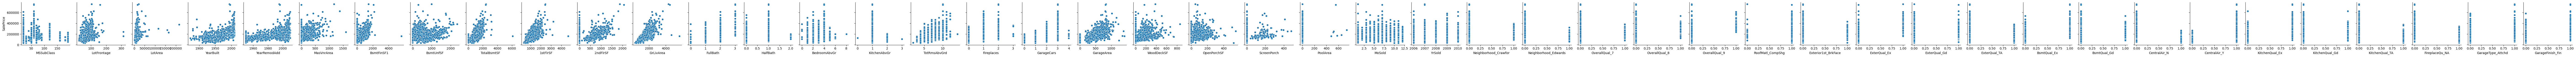

In [44]:
sns.pairplot(train_p, x_vars=selected_feature, y_vars=['SalePrice'])

In [45]:
forest = RandomForestRegressor(n_estimators = 100,random_state=123)
forest.fit(X_train, y_train)

/tmp/ipykernel_20/125650449.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(random_state=123)

In [46]:
y_predicted = forest.predict(X_test)
print( f'The error mean squared log error is {mean_squared_log_error(y_test, y_predicted)}')


The error mean squared log error is 0.02113580495499797


* ### Neural Network

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [48]:
activ='relu'
input_layer = len(X_train.columns)

def build_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(input_layer,)))
    model.add(keras.layers.Dense(150,activation=activ))
    model.add(keras.layers.Dense(150))
    model.add(keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    
    return model

In [49]:
#model = build_model()

In [50]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
EPOCHS = 1000

#history = model.fit(x = X_train, y = y_train, epochs=EPOCHS, validation_split = 0.15, verbose=0, callbacks=[PrintDot()])

In [51]:
'''hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()'''

"hist = pd.DataFrame(history.history)\nhist['epoch'] = history.epoch\nhist.tail()"

In [52]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'],hist['mae'], label='Train error')
    plt.plot(hist['epoch'],hist['val_mae'], label='Validation error')
    

    plt.ylim([0,45000])
    plt.legend()
    plt.show()


#plot_history(history)


....................................................................................................
....................................................................................................
...........................................................................................

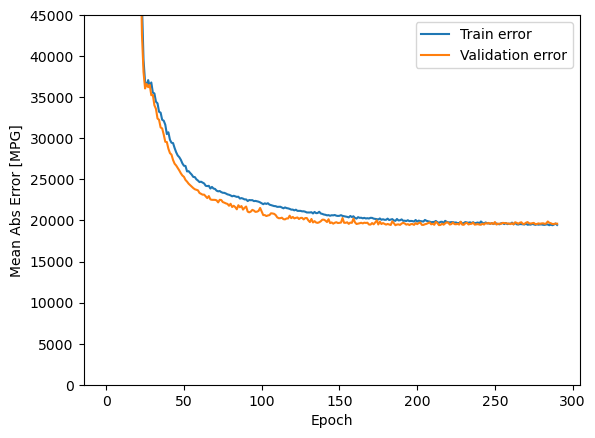

In [53]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.15, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history)

12/12 [==============================] - 0s 1ms/step


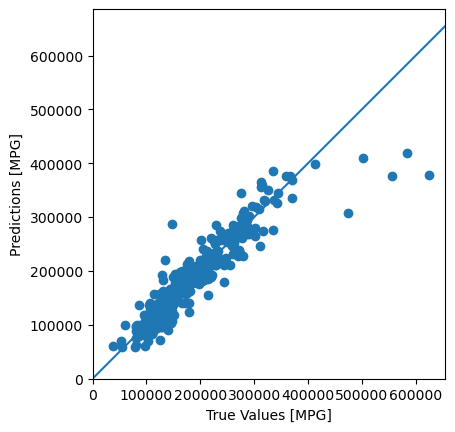

In [54]:
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000000, 1000000], [-1000000, 1000000])

In [55]:
mean_squared_log_error(y_test,y_predicted)

0.022760929639980866

# Results

After testing different configurations of Neural networks, the lower error obtained was greater then the random forest. The submission will be done using the Random Forest Model

In [56]:
y_predicted = forest.predict(X_test)
print( f'The error mean squared log error is {mean_squared_log_error(y_test, y_predicted)}')

The error mean squared log error is 0.02113580495499797


In [57]:
y_submission = forest.predict(test_p)

In [58]:
pd.DataFrame({'Id': teste.Id,
              'SalePrice': y_submission}).to_csv('submission.csv', index= False)